<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [3]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 166.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 200.1 MB/s eta 0:00:00


In [4]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 145.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 144.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 170.7 MB/s eta 0:00:00


**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [5]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-07-07 11:41:36--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  65.0MB/s    in 2.3s    

2025-07-07 11:41:39 (65.0 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [6]:
pd.set_option('display.max_rows', None)
print(df.dtypes)

ResponseId                          int64
MainBranch                         object
Age                                object
Employment                         object
RemoteWork                         object
Check                              object
CodingActivities                   object
EdLevel                            object
LearnCode                          object
LearnCodeOnline                    object
TechDoc                            object
YearsCode                          object
YearsCodePro                       object
DevType                            object
OrgSize                            object
PurchaseInfluence                  object
BuyNewTool                         object
BuildvsBuy                         object
TechEndorse                        object
Country                            object
Currency                           object
CompTotal                         float64
LanguageHaveWorkedWith             object
LanguageWantToWorkWith            

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



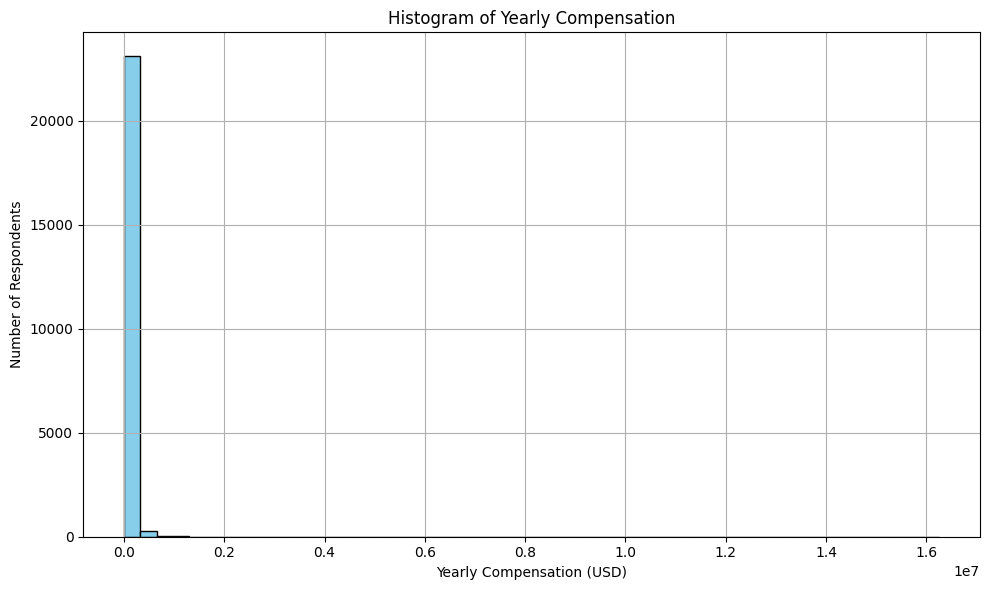

In [8]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Drop missing or zero/negative compensation values
df_filtered = df['ConvertedCompYearly'].dropna()
df_filtered = df_filtered[df_filtered > 0]

# Step 2: Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_filtered, bins=50, color='skyblue', edgecolor='black')

plt.title('Histogram of Yearly Compensation')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.tight_layout()
plt.show()


##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



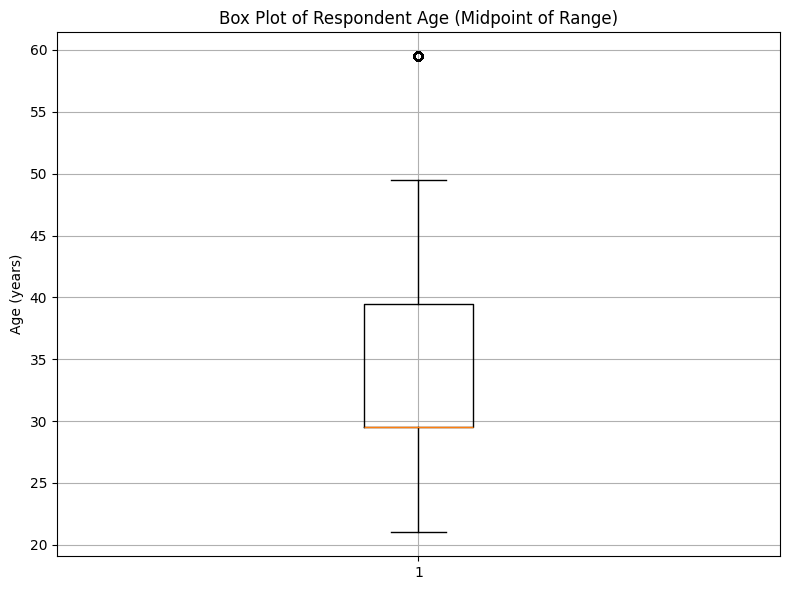

In [9]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Extract min and max ages from range strings (e.g., '25-34')
age_range = df['Age'].astype(str).str.extract(r'(\d{2})\D+(\d{2})')
age_range.columns = ['age_min', 'age_max']

# Step 2: Convert to numeric
age_range = age_range.apply(pd.to_numeric, errors='coerce')

# Step 3: Calculate midpoint of age range
df['Age_numeric'] = age_range.mean(axis=1)

# Step 4: Drop NaNs and plot boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df['Age_numeric'].dropna(), vert=True)

plt.title('Box Plot of Respondent Age (Midpoint of Range)')
plt.ylabel('Age (years)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



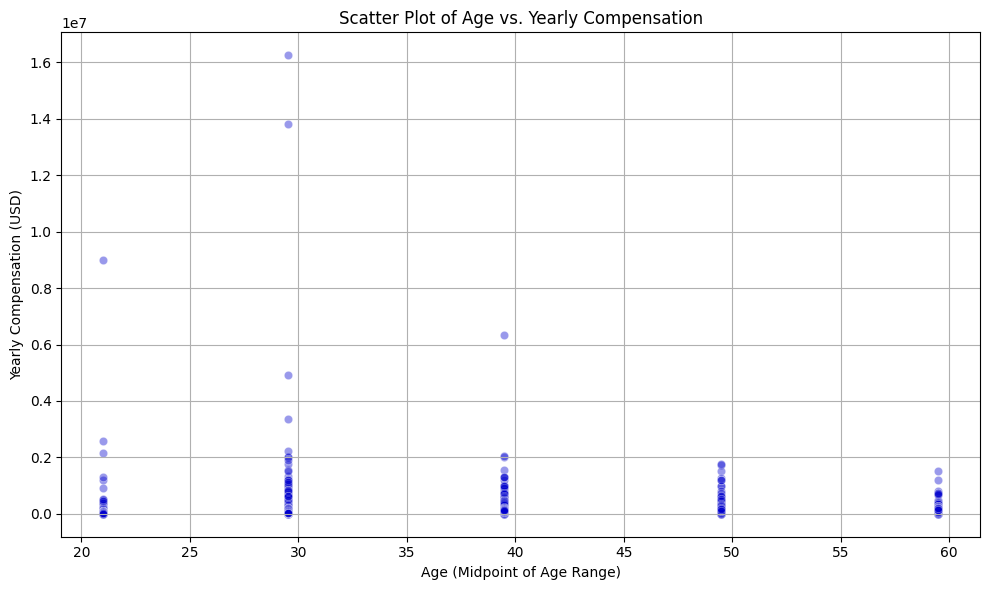

In [10]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Ensure Age_numeric is available (midpoint of age range)
age_range = df['Age'].astype(str).str.extract(r'(\d{2})\D+(\d{2})')
age_range.columns = ['age_min', 'age_max']
age_range = age_range.apply(pd.to_numeric, errors='coerce')
df['Age_numeric'] = age_range.mean(axis=1)

# Step 2: Drop missing or zero/negative values
scatter_df = df[['Age_numeric', 'ConvertedCompYearly']].dropna()
scatter_df = scatter_df[scatter_df['ConvertedCompYearly'] > 0]

# Step 3: Plot
plt.figure(figsize=(10, 6))
plt.scatter(scatter_df['Age_numeric'], scatter_df['ConvertedCompYearly'],
            alpha=0.4, color='mediumblue', edgecolors='w', linewidths=0.5)

plt.title('Scatter Plot of Age vs. Yearly Compensation')
plt.xlabel('Age (Midpoint of Age Range)')
plt.ylabel('Yearly Compensation (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


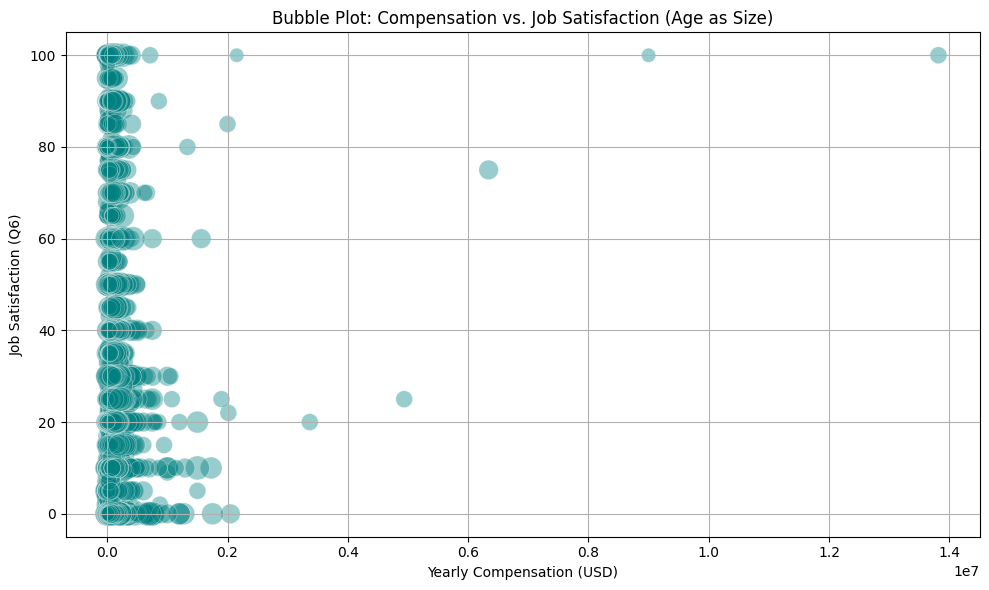

In [11]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Prepare Age_numeric (if not already done)
age_range = df['Age'].astype(str).str.extract(r'(\d{2})\D+(\d{2})')
age_range.columns = ['age_min', 'age_max']
age_range = age_range.apply(pd.to_numeric, errors='coerce')
df['Age_numeric'] = age_range.mean(axis=1)

# Step 2: Filter data
bubble_df = df[['ConvertedCompYearly', 'JobSatPoints_6', 'Age_numeric']].dropna()
bubble_df = bubble_df[bubble_df['ConvertedCompYearly'] > 0]

# Optional: normalize bubble size for better visual scaling
bubble_df['BubbleSize'] = bubble_df['Age_numeric'] * 5  # Adjust multiplier for visibility

# Step 3: Plot bubble chart
plt.figure(figsize=(10, 6))
plt.scatter(
    bubble_df['ConvertedCompYearly'],
    bubble_df['JobSatPoints_6'],
    s=bubble_df['BubbleSize'],
    alpha=0.4,
    color='teal',
    edgecolors='w',
    linewidths=0.5
)

plt.title('Bubble Plot: Compensation vs. Job Satisfaction (Age as Size)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (Q6)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



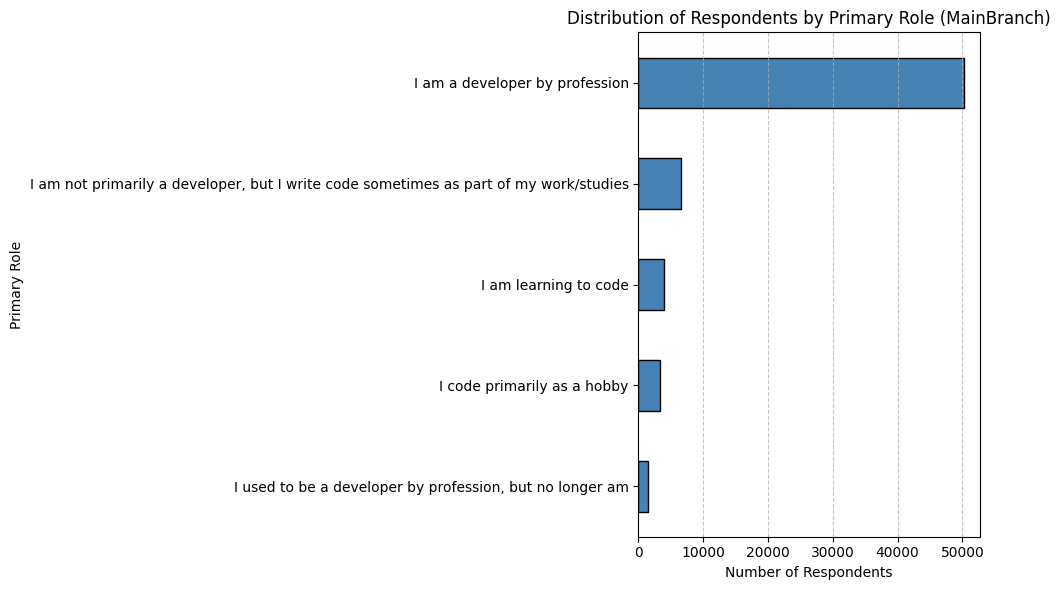

In [12]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Count values in MainBranch
main_branch_counts = df['MainBranch'].value_counts().sort_values()

# Step 2: Plot as a horizontal bar chart
plt.figure(figsize=(10, 6))
main_branch_counts.plot(kind='barh', color='steelblue', edgecolor='black')

plt.title('Distribution of Respondents by Primary Role (MainBranch)')
plt.xlabel('Number of Respondents')
plt.ylabel('Primary Role')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



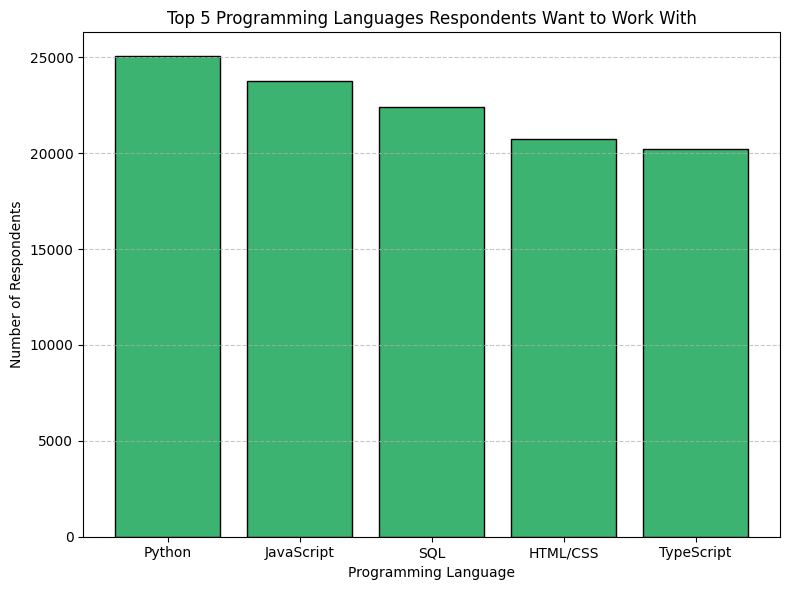

In [13]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Drop missing values and split semicolon-separated strings
lang_series = df['LanguageWantToWorkWith'].dropna().str.split(';')

# Step 2: Flatten the list and count language frequency
from collections import Counter
all_langs = [lang.strip() for sublist in lang_series for lang in sublist]
lang_counts = Counter(all_langs)

# Step 3: Get the top 5 most wanted languages
top5_langs = dict(lang_counts.most_common(5))

# Step 4: Plot vertical bar chart
plt.figure(figsize=(8, 6))
plt.bar(top5_langs.keys(), top5_langs.values(), color='mediumseagreen', edgecolor='black')

plt.title('Top 5 Programming Languages Respondents Want to Work With')
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


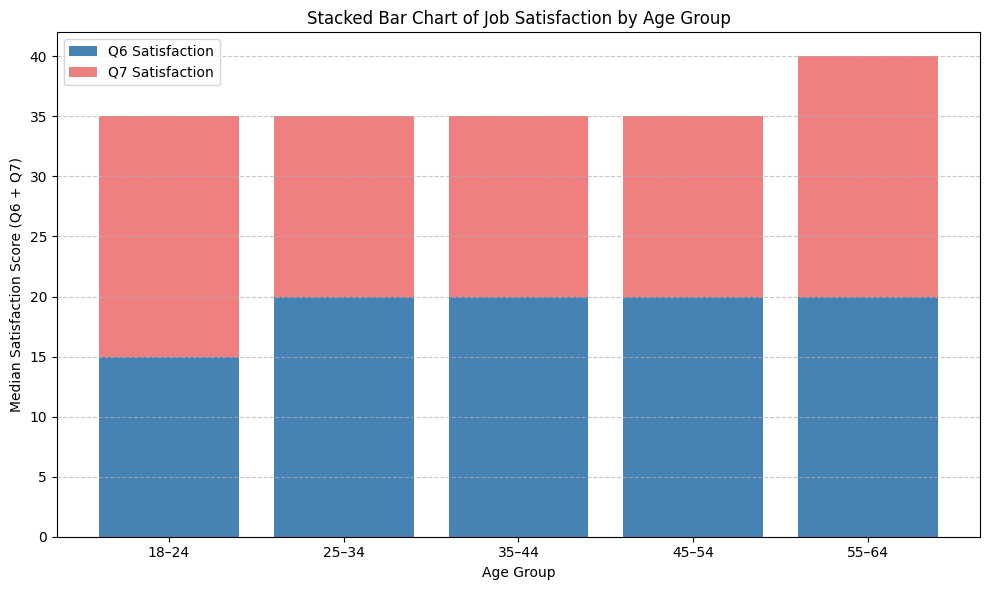

In [14]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Extract numeric age range (midpoint or lower bound)
age_range = df['Age'].astype(str).str.extract(r'(\d{2})\D+(\d{2})')
age_range.columns = ['age_min', 'age_max']
age_range = age_range.apply(pd.to_numeric, errors='coerce')
df['AgeGroup'] = pd.cut(age_range.mean(axis=1), bins=[0, 24, 34, 44, 54, 64, 100],
                        labels=['18–24', '25–34', '35–44', '45–54', '55–64', '65+'])

# Step 2: Group and calculate medians
grouped = df.groupby('AgeGroup', observed=True)[['JobSatPoints_6', 'JobSatPoints_7']].median().dropna()

# Step 3: Plot stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(grouped.index, grouped['JobSatPoints_6'], label='Q6 Satisfaction', color='steelblue')
plt.bar(grouped.index, grouped['JobSatPoints_7'], bottom=grouped['JobSatPoints_6'], label='Q7 Satisfaction', color='lightcoral')

plt.title('Stacked Bar Chart of Job Satisfaction by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Satisfaction Score (Q6 + Q7)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



<Figure size 1000x600 with 0 Axes>

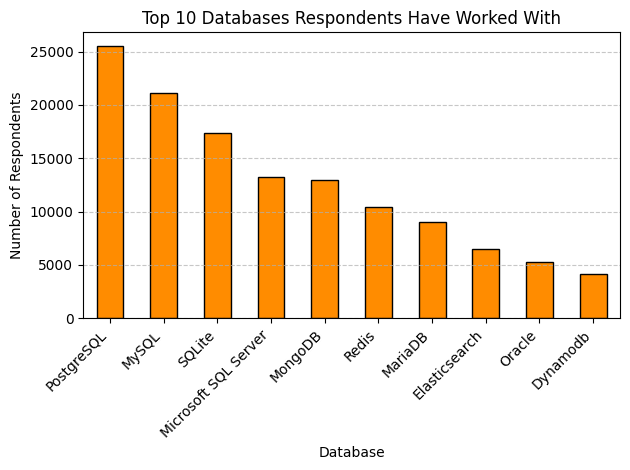

In [15]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Step 1: Clean and split semicolon-separated database entries
db_series = df['DatabaseHaveWorkedWith'].dropna().str.split(';')

# Step 2: Flatten the list into a single list of database names
all_dbs = [db.strip() for sublist in db_series for db in sublist]

# Step 3: Count database frequencies
db_counts = Counter(all_dbs)

# Step 4: Convert to DataFrame and get top N (e.g., top 10)
top_dbs = pd.DataFrame.from_dict(db_counts, orient='index', columns=['Count'])
top_dbs = top_dbs.sort_values(by='Count', ascending=False).head(10)

# Step 5: Plot
plt.figure(figsize=(10, 6))
top_dbs.plot(kind='bar', legend=False, color='darkorange', edgecolor='black')

plt.title('Top 10 Databases Respondents Have Worked With')
plt.ylabel('Number of Respondents')
plt.xlabel('Database')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



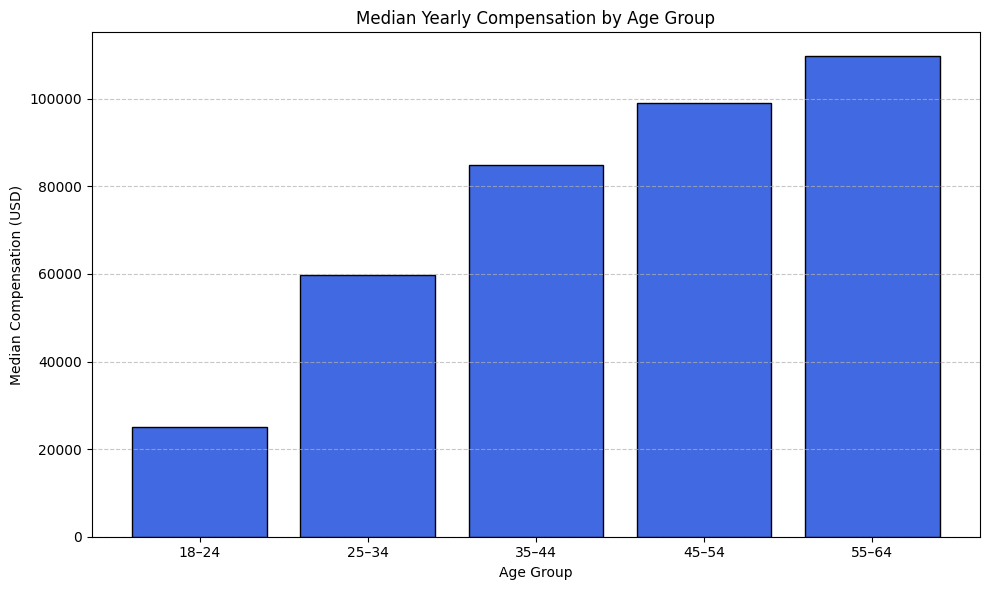

In [18]:
## Write your code here

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create numeric age midpoint from 'Age'
age_range = df['Age'].astype(str).str.extract(r'(\d{2})\D+(\d{2})')
age_range.columns = ['age_min', 'age_max']
age_range = age_range.apply(pd.to_numeric, errors='coerce')
df['AgeGroup'] = pd.cut(age_range.mean(axis=1),
                        bins=[0, 24, 34, 44, 54, 64, 100],
                        labels=['18–24', '25–34', '35–44', '45–54', '55–64', '65+'])

# Step 2: Calculate median compensation per age group
grouped_comp = df.groupby('AgeGroup', observed=True)['ConvertedCompYearly'].median().dropna()

# Step 3: Plot
plt.figure(figsize=(10, 6))
plt.bar(grouped_comp.index, grouped_comp.values, color='royalblue', edgecolor='black')

plt.title('Median Yearly Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Compensation (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



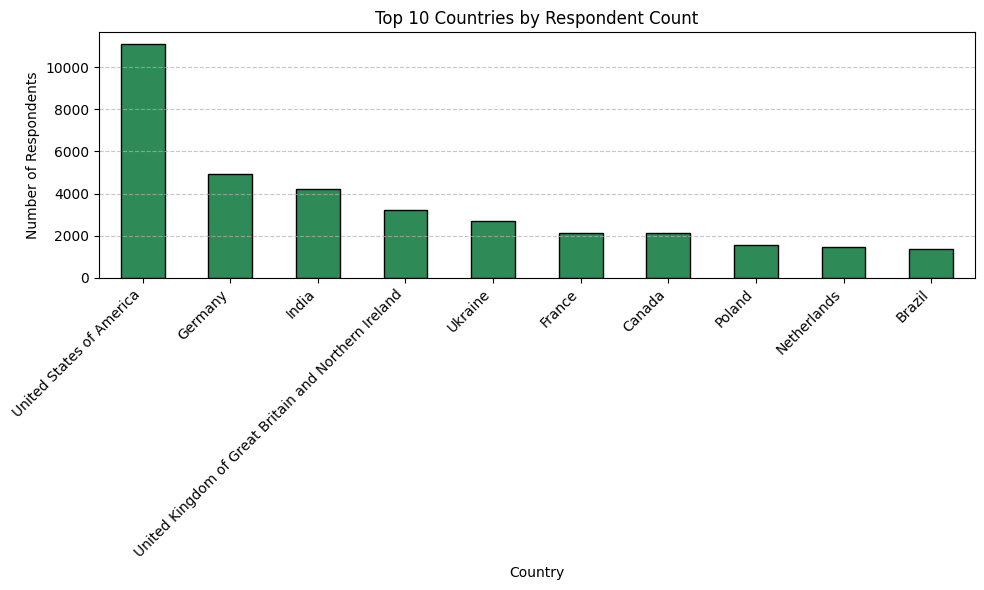

In [20]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Count respondents by country
country_counts = df['Country'].value_counts().head(10)  # Top 10 countries

# Step 2: Plot
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='seagreen', edgecolor='black')

plt.title('Top 10 Countries by Respondent Count')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
